### Car-Accident-Severity

Introduction | Business Undertanding
In an effort to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.

Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.

Severity codes are as follows:

* 0 : Little to no Probability (Clear Conditions)


1 : Very Low Probablility - Chance or Property Damage

2 : Low Probability - Chance of Injury

3 : Mild Probability - Chance of Serious Injury

4 : High Probability - Chance of Fatality


### Aim
In this project, I aim to predict whether an accident that happens under a specific set of circumstances will be an accident limited to property damage or if it will include some form of physical injury to the driver and passengers.



## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [81]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file. You'll likely use this a lot.

In [82]:
df=pd.read_csv('Data-Collisions.csv',low_memory=False)
df.shape

(194673, 38)

## Data Exploration (exploratory data analysis or EDA)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your **data dictionary** and remind yourself of what different columns mean.


Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.

In [83]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [84]:
df.head(4)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N


In [85]:
df.tail(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [86]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [87]:
# Let's see how many positive (2) and negative (2) samples we have in our dataframe

df.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

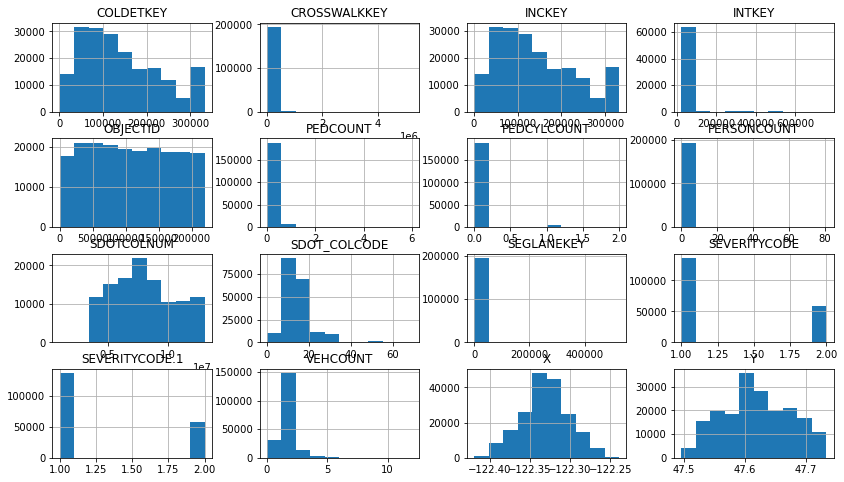

In [88]:
df.hist(figsize=(14,8));

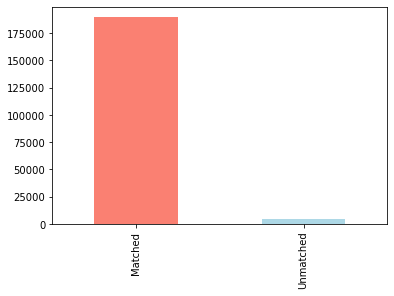

In [89]:
df.STATUS.value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [90]:
# Compare target column with status column
pd.crosstab(df.SEVERITYCODE, df.STATUS)

STATUS,Matched,Unmatched
SEVERITYCODE,,
1,132627,3858
2,57159,1029


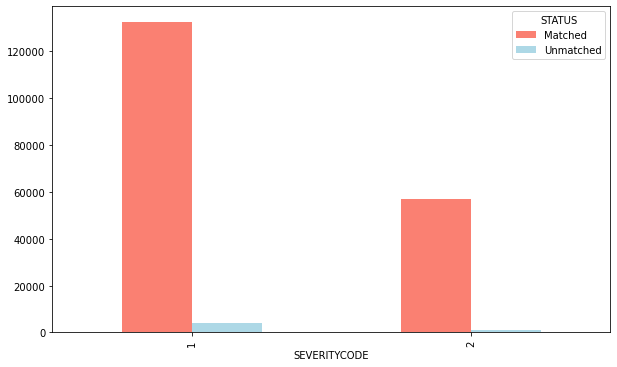

In [91]:
# Create a plot
pd.crosstab(df.SEVERITYCODE, df.STATUS).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

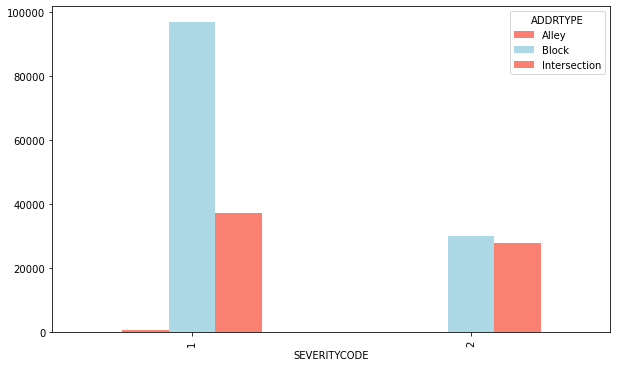

In [92]:

# Create a plot
pd.crosstab(df.SEVERITYCODE, df.ADDRTYPE).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

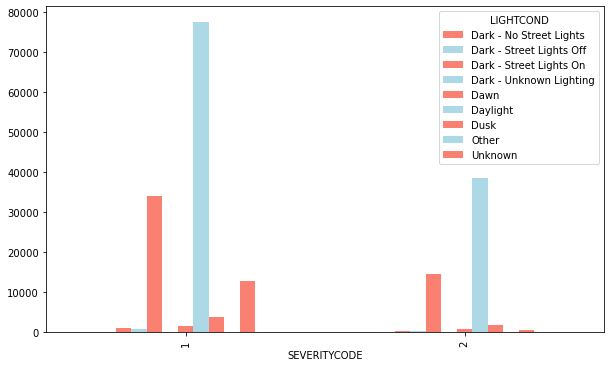

In [93]:


# Create a plot
pd.crosstab(df.SEVERITYCODE, df.LIGHTCOND).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [94]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


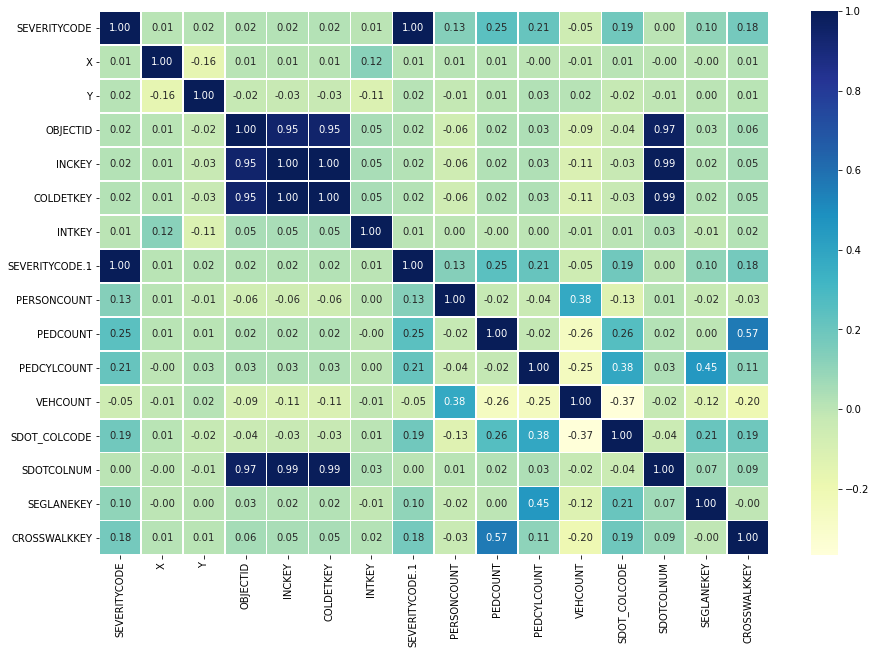

In [95]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

check for missing values

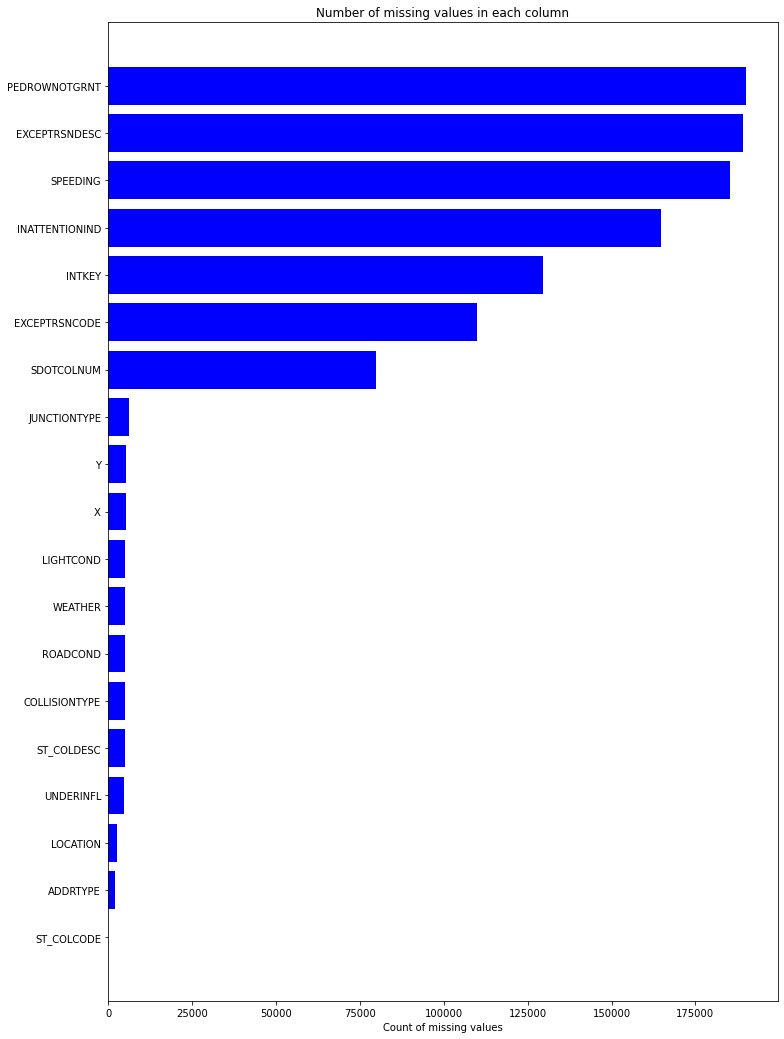

In [96]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

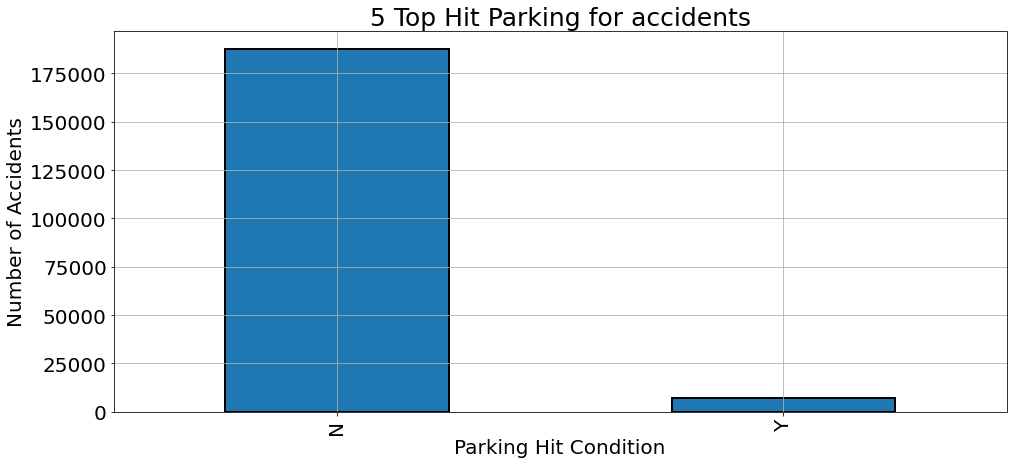

In [97]:
fig, ax=plt.subplots(figsize=(16,7))
df['HITPARKEDCAR'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Parking Hit Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Hit Parking for accidents',fontsize=25)
plt.grid()
plt.ioff()

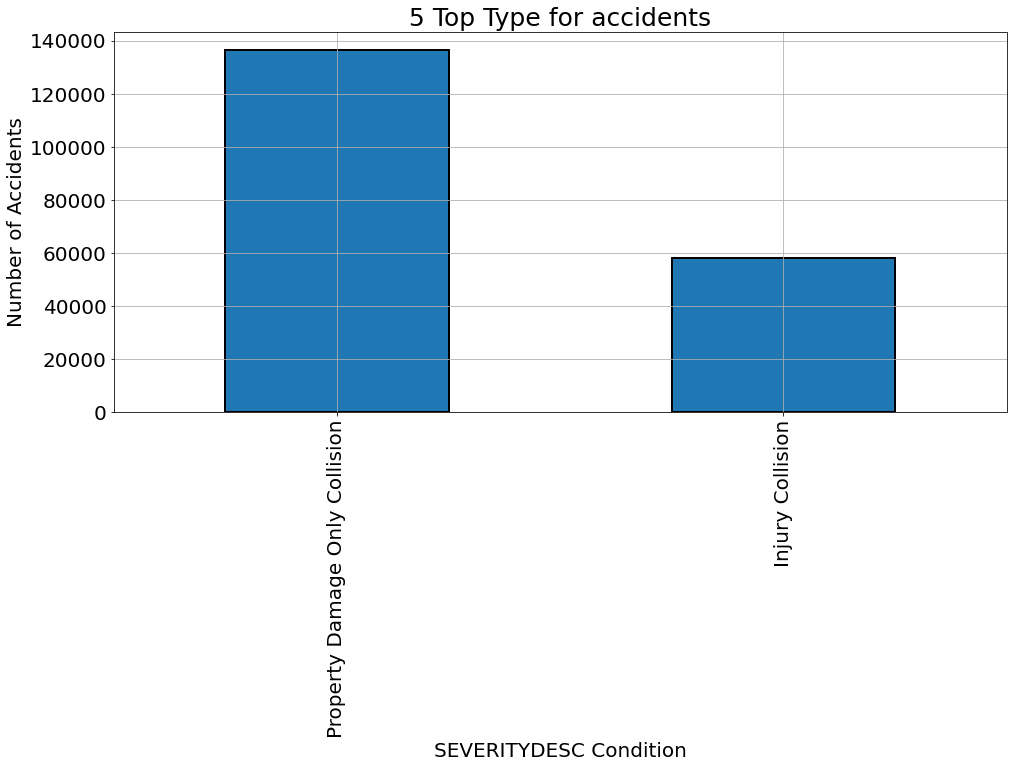

In [127]:

fig, ax=plt.subplots(figsize=(16,7))
df['SEVERITYDESC'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('SEVERITYDESC Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Type for accidents',fontsize=25)
plt.grid()
plt.ioff()

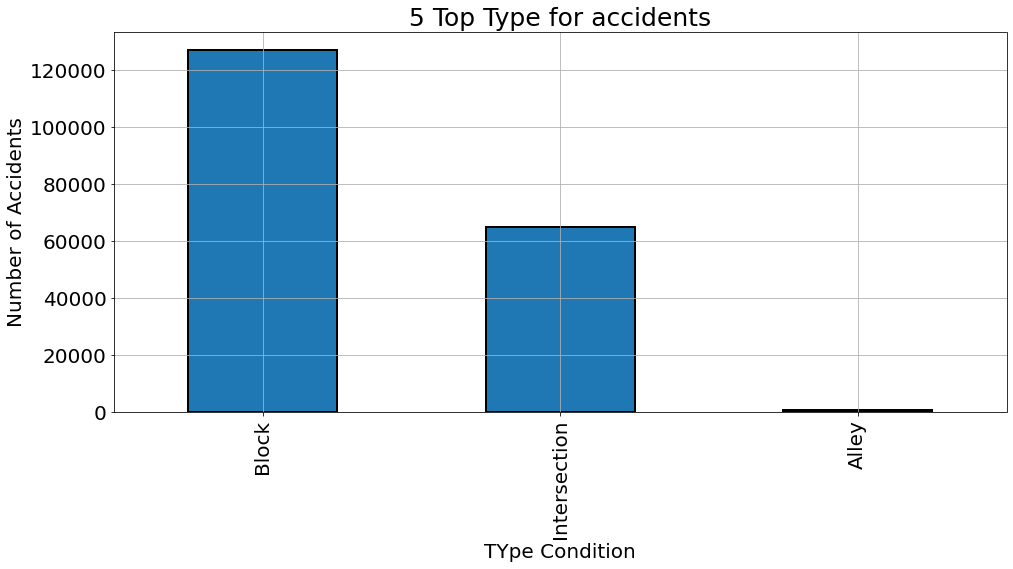

In [98]:
fig, ax=plt.subplots(figsize=(16,7))
df['ADDRTYPE'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('TYpe Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Type for accidents',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

lets sapater the datasets based on dtype so that we can make good analysis


In [128]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,SEVERITYCODE,int64
1,X,float64
2,Y,float64
3,OBJECTID,int64
4,INCKEY,int64
5,COLDETKEY,int64
6,REPORTNO,object
7,STATUS,object
8,ADDRTYPE,object
9,INTKEY,float64


In [129]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,12
1,float64,4
2,object,22


get the ratio and the columns with more missing values above 80%



In [130]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.777]


,columns_name,missing_count,missing_ratio
12,EXCEPTRSNDESC,189035,0.971039
25,INATTENTIONIND,164868,0.846897
30,PEDROWNOTGRNT,190006,0.976026
32,SPEEDING,185340,0.952058


In [131]:
missin = missing_df.loc[missing_df['missing_count']>25000]
removelist = missin['columns_name'].tolist()
removelist

['INTKEY',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'INATTENTIONIND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING']

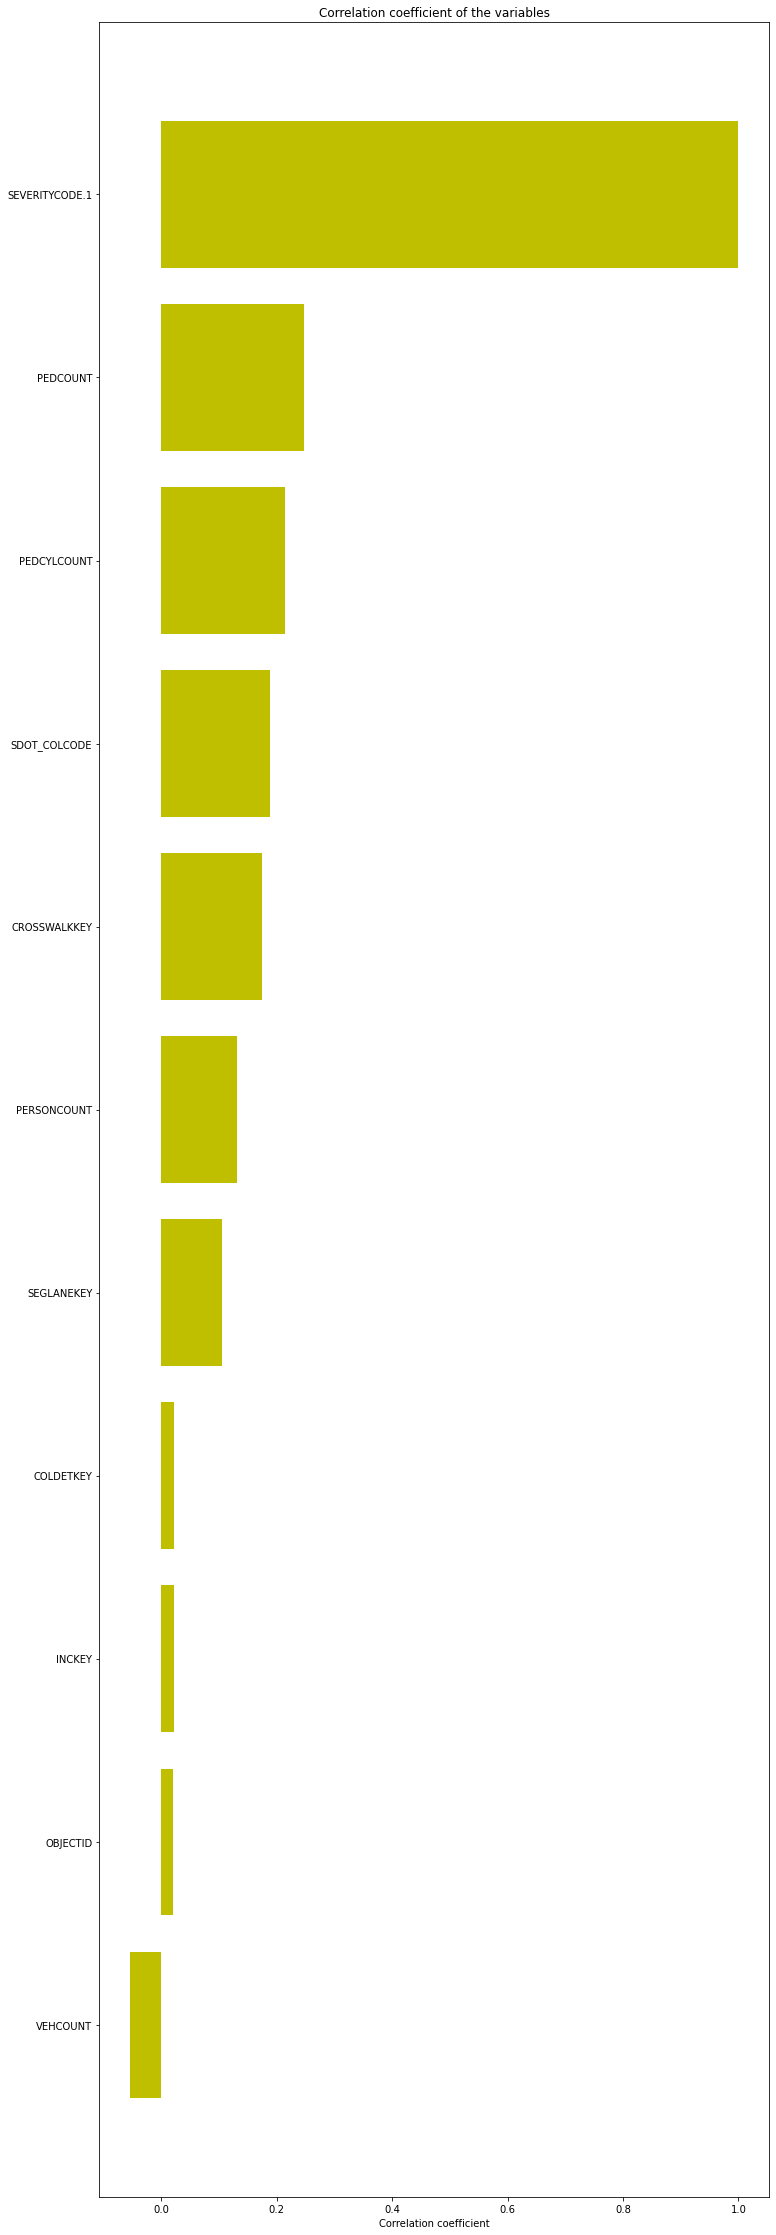

In [132]:
x_cols = [col for col in df.columns if col not in ['SEVERITYCODE'] if df[col].dtype=='int64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.SEVERITYCODE.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [133]:
df_copy=df.copy()

In [134]:
df_copy.dropna(inplace=True,axis=1)

In [135]:
df_copy.shape

(194673, 19)

In [136]:
df_copy.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYCODE.1,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1,1307,1307,3502005,Matched,2,Injury Collision,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,N
1,1,2,52200,52200,2607959,Matched,1,Property Damage Only Collision,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,N
2,1,3,26700,26700,1482393,Matched,1,Property Damage Only Collision,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,N
3,1,4,1144,1144,3503937,Matched,1,Property Damage Only Collision,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,N
4,2,5,17700,17700,1807429,Matched,2,Injury Collision,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,N


Balancing the Dataset




In [137]:
df_copy.SEVERITYCODE.value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [138]:
df_copy.SEVERITYCODE.value_counts()/df_copy.shape[0]

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

 severitycode in class 1 is nearly three times the size of class 2.


We can fix this by downsampling the majority class.

In [139]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_copy[df_copy.SEVERITYCODE==1]
df_minority = df_copy[df_copy.SEVERITYCODE==2]
 
# Upsample minority class
df_minority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=58188,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [140]:
df_upsampled.head()

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,SEVERITYCODE.1,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1,1307,1307,3502005,Matched,2,Injury Collision,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,N
4,2,5,17700,17700,1807429,Matched,2,Injury Collision,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,N
7,2,9,330897,332397,EA30304,Matched,2,Injury Collision,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,6855,0,N
9,2,12,58600,58600,2072105,Matched,2,Injury Collision,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,N
14,2,19,1212,1212,3507861,Matched,2,Injury Collision,2,0,0,2,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,N


In [141]:
X= df_upsampled[["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"]].values
y = df_upsampled["SEVERITYCODE"].values
print("Actual values of the test cases: " + str(y[0:20]))

Actual values of the test cases: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [142]:
from sklearn import metrics
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
scores = {}

In [144]:
#Decision Tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
y_hat = clf_tree.predict(X_train)
scores["Tree-f1-score"] = f1_score(y_train, y_hat, average = "weighted")
scores["Tree-jaccard"] = jaccard_score(y_train, y_hat)
print("Using a decision tree, we get the predicted values to be: " + str(y_hat[0:20]))
scores

Using a decision tree, we get the predicted values to be: [1 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 2 1 1 2]


{'Tree-f1-score': 0.6738984029999333, 'Tree-jaccard': 0.5358531749081574}

Test set Accuracy at k= 1 :  0.4403790786948177
Test set Accuracy at k= 2 :  0.5455097701731295
Test set Accuracy at k= 3 :  0.45883224293297126
Test set Accuracy at k= 4 :  0.5479880927940874
Test set Accuracy at k= 5 :  0.529447346714325
Test set Accuracy at k= 6 :  0.5479088639200999
Test set Accuracy at k= 7 :  0.48373432734666216
Test set Accuracy at k= 8 :  0.5475122454240784
Test set Accuracy at k= 9 :  0.4747309877886592


Text(0, 0.5, 'Testing Accuracy')

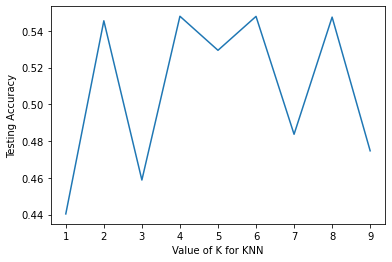

In [147]:
k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    y_hat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_score(y_test, y_hat))
    accuracy_score.append(jaccard_score(y_test, y_hat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [148]:
k = 9
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
y_hat = KNN.predict(X)
print("Predicted values using k = 9: " + str(y_hat[0:20]))

Predicted values using k = 9: [2 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2]


In [149]:
print("KNN F1-Score: " + str(f1_score(y, y_hat, average = "weighted")))
print("KNN Jaccard Score: " + str(jaccard_score(y, y_hat)))

KNN F1-Score: 0.35772288450114387
KNN Jaccard Score: 0.2223274301292323


### Discussion
In the beginning of this notebook, we had categorical data that was of type 'object'. This is not a data type that we could have fed through an algoritim, so label encoding was used to created new classes that were of type int8; a numerical data type.

After solving that issue we were presented with another - imbalanced data. As mentioned earlier, class 1 was nearly three times larger than class 2. The solution to this was downsampling the majority class with sklearn's resample tool. We downsampled to match the minority class exactly with 58188 values each.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature.

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

### Conclusion

 